In [7]:
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('toy.csv')
data.head()

,0.000000000000000000e+00,0.000000000000000000e+00.1,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,0.000000000000000000e+00.6,0.000000000000000000e+00.7,0.000000000000000000e+00.8,0.000000000000000000e+00.9,...,0.000000000000000000e+00.54,0.000000000000000000e+00.55,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996078,0.996078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996078,0.996078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [20]:
n, m = data.shape

y = data.to_numpy().reshape(-1, )

theta = cp.Variable(y.shape[0])
lambd = cp.Parameter()

objective_fn = 0.5 * cp.norm2(y - theta)

exprs = []
for i in range(n):
    for j in range(m):
        if (abs(i - j)%m==1) ^ (abs(i - j)/n==1):
            exprs.append(cp.abs(theta[i] - theta[j]))

regularizer =  sum(exprs)

objective = cp.Minimize(objective_fn + regularizer)

problem = cp.Problem(objective)

lambd.value = 1

problem.solve()

7.380813544731156e-15

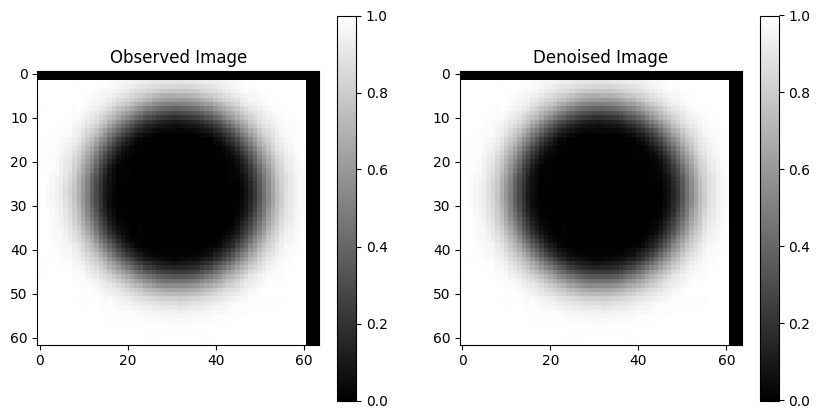

In [21]:
y_image = y.reshape((n, m))

theta_image = theta.value.reshape((n, m))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_image, cmap='gray')
plt.title("Observed Image")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(theta_image, cmap='gray')
plt.title("Denoised Image")
plt.colorbar()

plt.show()